In [1]:
from scipy import signal
numtaps = 13
f = 4000
coeff = signal.firwin(numtaps, f, pass_zero ='lowpass',fs=16000)


(0.0, 0.5076923076923077)

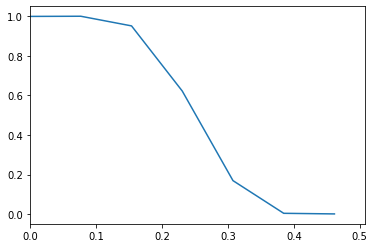

In [2]:
import numpy as np
from scipy import fftpack
fft_coeff = fftpack.fft(coeff)
pow = np.abs(fft_coeff)
freqs = fftpack.fftfreq(len(coeff))
idx = np.argsort(freqs)
import matplotlib.pyplot as plt
plt.plot(freqs[idx], pow[idx])
plt.xlim(left=0)

In [3]:
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read("welcome.wav")
type(sig_audio)

<ipython-input-3-d7345096e90b>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_sample, sig_audio = wavfile.read("welcome.wav")


numpy.ndarray


Shape of Signal: (645632,)
Signal Datatype: int16
Signal duration: 40.35 seconds


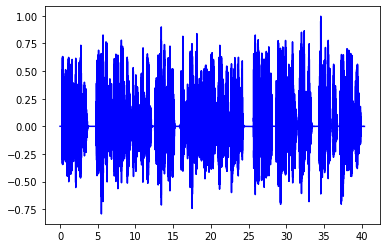

In [4]:
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')

# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
#pow_audio_signal = pow_audio_signal [:100]
#time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample) #in ms
time_axis = np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)
plt.plot(time_axis, pow_audio_signal, color='blue')

In [5]:
sig_audio 

array([ -1,  -1,  -1, ..., -26, -26, -25], dtype=int16)

In [6]:
N=len(coeff)+len(sig_audio)-1 #lunghezza della convoluzione 
N

645644

In [7]:
#audio = [sig_audio[i] if i<len(sig_audio) else 0 for i in range(N)] #DFT 
#coeff_1 = [coeff[i] if i<len(coeff) else 0 for i in range(N)]
fft_coeff = fftpack.fft(coeff,N)
fft_audio = fftpack.fft(sig_audio,N)
out = fft_audio*fft_coeff
freqs = fftpack.fftfreq(N)


(0.0, 0.5499983737167851)

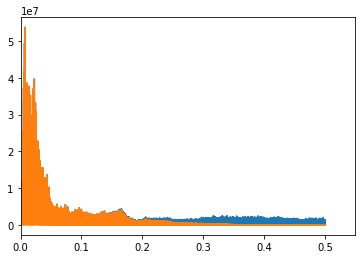

In [8]:
plt.plot(freqs, np.abs(fft_audio))
plt.plot(freqs, np.abs(out))
plt.xlim(left = 0)

/home/federico/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


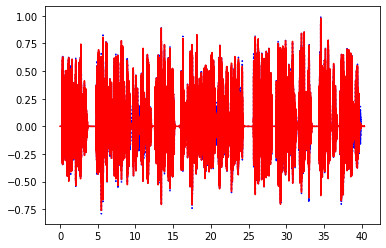

In [9]:
time_output = fftpack.ifft(out,N)/np.power(2,15)
time_output=time_output[numtaps-1:]
plt.plot(time_axis,pow_audio_signal,':',color='blue')
plt.plot(time_axis,time_output,color='red')
plt.show()

In [10]:
time_output

array([-3.22646616e-05-1.29975670e-17j, -3.02426487e-05-2.31944881e-17j,
       -2.99677193e-05+1.76923610e-17j, ...,
       -7.14816504e-06-5.16665924e-17j, -6.87323561e-06-3.26148836e-17j,
       -1.40866146e-16-2.81739420e-17j])

In [11]:
#FILTER DESIGN

numtaps = 11
f = [995.0,1005.0]
fs = 44100
coeff = signal.firwin(numtaps, f, pass_zero ='bandpass',fs=fs)

In [12]:
for i in range(len(coeff)):
    str = " signal coeff_{}_LP : integer:={};".format(i, int(np.round(coeff[i]*2**22)))
    print(str)

 signal coeff_0_LP : integer:=50460;
 signal coeff_1_LP : integer:=117783;
 signal coeff_2_LP : integer:=301751;
 signal coeff_3_LP : integer:=545596;
 signal coeff_4_LP : integer:=752508;
 signal coeff_5_LP : integer:=833429;
 signal coeff_6_LP : integer:=752508;
 signal coeff_7_LP : integer:=545596;
 signal coeff_8_LP : integer:=301751;
 signal coeff_9_LP : integer:=117783;
 signal coeff_10_LP : integer:=50460;


In [13]:
import numpy as np
from scipy import fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [14]:
freq_sample_fil, fil = wavfile.read("filtered.wav")
freq_sample_sum, sum = wavfile.read("sum_pure.wav")
freq_sample_th, th = wavfile.read("10kHz_44100Hz_16bit_05sec.wav")

fft_fil = fftpack.fft(fil,len(fil)) / (len(fil)*np.power(2,15))
freqs_fil = fftpack.fftfreq(len(fil))

fft_sum = fftpack.fft(sum,len(sum)) / (len(sum)*np.power(2,15))
freqs_sum = fftpack.fftfreq(len(sum))

fft_th = fftpack.fft(th,len(th)) / (len(th)*np.power(2,15))
freqs_th = fftpack.fftfreq(len(th))

Text(0.5, 1.0, 'Expected')

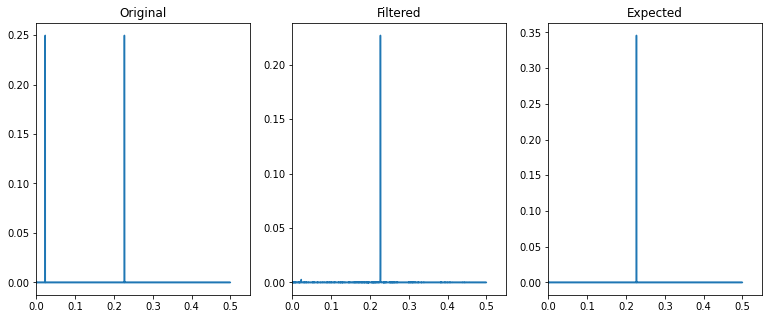

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

ax[0].plot(freqs_sum, np.abs(fft_sum))
ax[0].set_xlim(left=0)
ax[0].set_title("Original")

ax[1].plot(freqs_fil, np.abs(fft_fil))
ax[1].set_xlim(left=0)
ax[1].set_title("Filtered")

ax[2].plot(freqs_th, np.abs(fft_th))
ax[2].set_xlim(left=0)
ax[2].set_title("Expected")

(0.0, 0.001)

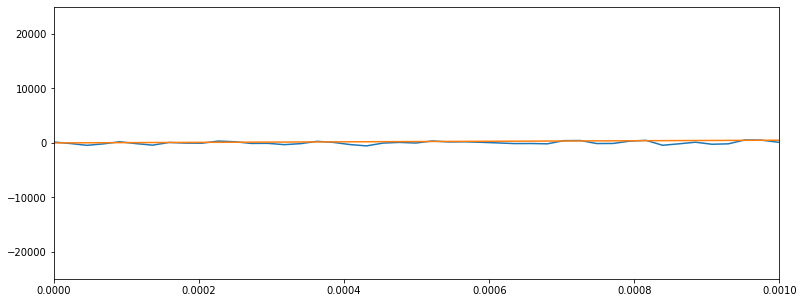

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))

#ax.plot(np.arange(0, len(sum), 1) / float(freq_sample_sum), sum)
ax.plot(np.arange(0, len(fil), 1) / float(freq_sample_fil), fil)
ax.plot(np.arange(0, len(th), 1) / float(freq_sample_th)*2000, th)
ax.set_xlim(right=1/1000,left=0)